In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import pandas as pd

import bacco
import pyfftw

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import utils
import plotter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## check rerun

### Load in fields

In [2]:
import gc
import psutil

def print_memory_usage():
    """Print current memory usage"""
    process = psutil.Process()
    memory_mb = process.memory_info().rss / 1024 / 1024
    print(f"Current memory usage: {memory_mb:.1f} MB")

print_memory_usage()

Current memory usage: 140.9 MB


In [3]:
n_grid_small = 512

def load_array_slice(filename, slice_indices, description=""):
    """Load only a slice of a large numpy array using memory mapping"""
    print(f"Loading {description} from {filename}")
    print_memory_usage()
    
    # Use memory mapping to avoid loading full array
    full_array = np.load(filename, mmap_mode='r')
    print(f"Full array shape: {full_array.shape}")
    
    # Extract only the slice we need
    sliced_array = full_array[slice_indices].copy()
    print(f"Sliced array shape: {sliced_array.shape}")
    
    # Clean up
    del full_array
    gc.collect()
    print_memory_usage()
    print("---")
    
    return sliced_array

In [4]:
tag_params = '_p5_n10000_rerun'
idx_LH = 0

# change this directory path as needed
dir_mocks = f'/scratch/kstoreyf/muchisimocks/muchisimocks_lib{tag_params}'
subdir_prefix = 'LH'
fn_fields = f'{dir_mocks}/{subdir_prefix}{idx_LH}/bias_fields_eul_deconvolved_{idx_LH}.npy'
fn_fields_zspace = f'{dir_mocks}/{subdir_prefix}{idx_LH}/bias_fields_eul_zspace_deconvolved_{idx_LH}.npy'

bias_terms_eul_1 = np.load(fn_fields)
bias_terms_eul_zspace_1 = np.load(fn_fields_zspace)

In [5]:
fn_disp = f'{dir_mocks}/{subdir_prefix}{idx_LH}/pred_disp.npy'
# Use memory mapping to avoid loading the full array
disp_full = np.load(fn_disp, mmap_mode='r')
print(disp_full.shape)
# Extract only the slice we need
disp_1 = disp_full[0,0,:n_grid_small,:n_grid_small].copy()
print(disp_1.shape)
# Delete reference to the memory-mapped array
del disp_full
gc.collect()

(3, 512, 512, 512)
(512, 512)


33

In [6]:
fn_vel = f'{dir_mocks}/{subdir_prefix}{idx_LH}/pred_vel.npy'
# Use memory mapping to avoid loading the full array
vel_full = np.load(fn_vel, mmap_mode='r')
print(vel_full.shape)
# Extract only the slice we need
vel_1 = vel_full[0,0,:n_grid_small,:n_grid_small].copy()
print(vel_1.shape)
# Delete reference to the memory-mapped array
del vel_full
gc.collect()

(3, 512, 512, 512)
(512, 512)


11

In [7]:
tag_params = '_p5_n10000_rerun'
idx_LH = 0

# change this directory path as needed
dir_mocks = f'/scratch/kstoreyf/muchisimocks/muchisimocks_lib{tag_params}'
subdir_prefix = 'LHorig'
fn_fields = f'{dir_mocks}/{subdir_prefix}{idx_LH}/bias_fields_eul_deconvolved_{idx_LH}.npy'
fn_fields_zspace = f'{dir_mocks}/{subdir_prefix}{idx_LH}/bias_fields_eul_zspace_deconvolved_{idx_LH}.npy'

bias_terms_eul_2 = np.load(fn_fields)
bias_terms_eul_zspace_2 = np.load(fn_fields_zspace)

In [8]:
fn_disp = f'{dir_mocks}/{subdir_prefix}{idx_LH}/pred_disp.npy'
# Use memory mapping to avoid loading the full array
disp_full = np.load(fn_disp, mmap_mode='r')
print(disp_full.shape)
# Extract only the slice we need
disp_2 = disp_full[0,0,:n_grid_small,:n_grid_small].copy()
print(disp_2.shape)
# Delete reference to the memory-mapped array
del disp_full
gc.collect()

(3, 512, 512, 512)
(512, 512)


33

In [9]:
fn_vel = f'{dir_mocks}/{subdir_prefix}{idx_LH}/pred_vel.npy'
# Use memory mapping to avoid loading the full array
vel_full = np.load(fn_vel, mmap_mode='r')
print(vel_full.shape)
# Extract only the slice we need
vel_2 = vel_full[0,0,:n_grid_small,:n_grid_small].copy()
print(vel_2.shape)
# Delete reference to the memory-mapped array
del vel_full
gc.collect()

(3, 512, 512, 512)


(512, 512)


11

### Alternative: Use helper function for cleaner loading

In [10]:
# Example of using the helper function - uncomment to use this approach instead
# disp_1_alt = load_array_slice(fn_disp, (0, 0, slice(None, n_grid_small), slice(None, n_grid_small)), "displacement field 1")
# vel_1_alt = load_array_slice(fn_vel, (0, 0, slice(None, n_grid_small), slice(None, n_grid_small)), "velocity field 1")

### Check differences

In [11]:
print(disp_1[0,:10])
print(disp_2[0,:10])

[3.9092624 4.455517  5.4684896 5.997325  5.8781176 6.121212  6.12027
 4.819264  3.7870712 3.9727814]
[3.909006  4.4553547 5.468509  5.9975567 5.8779445 6.1210756 6.120313
 4.819353  3.7870395 3.9727006]


In [12]:
fracdiff = (disp_1-disp_2)/disp_1
print(np.mean(fracdiff))
print(np.std(fracdiff))

1.5657923e-06
0.006838426


In [13]:
print(bias_terms_eul_1[0,0,0,:10])
print(bias_terms_eul_2[0,0,0,:10])

[ 29.01979     0.7767972  22.627161   81.554184   82.35525   175.16689
 208.36902    12.909483  111.90014   -21.333397 ]
[ 29.020197     0.77648944  22.62782     81.55371     82.355255
 175.16692    208.36707     12.908623   111.900894   -21.333427  ]


In [14]:
fracdiff_bias = (bias_terms_eul_1-bias_terms_eul_2)/bias_terms_eul_1
print(np.mean(fracdiff_bias))
print(np.std(fracdiff_bias))

0.00010525264
0.42454043


In [15]:
print(vel_1[0,:10])
print(vel_2[0,:10])

[190.18073 186.47038 234.99367 259.64484 261.07693 272.97455 258.94135
 198.58652 191.61954 171.74168]
[190.18073 186.47038 234.99367 259.64484 261.07693 272.97455 258.94135
 198.58652 191.61954 171.74168]


In [16]:
fracdiff_vel = (vel_1-vel_2)/vel_1
print(np.mean(fracdiff_vel))
print(np.std(fracdiff_vel))

0.0
0.0


### Plot fields

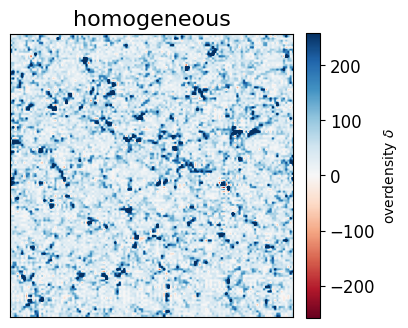

In [17]:
bias_field_labels = ['homogeneous', 'linear density field', 'quadratic density', 'tidal', 'Laplacian']
for i in range(len(bias_terms_eul_1)):
    plotter.plot_field(bias_terms_eul_1[i], figsize=(4,4), title=bias_field_labels[i],
                       show_labels=False)
    break

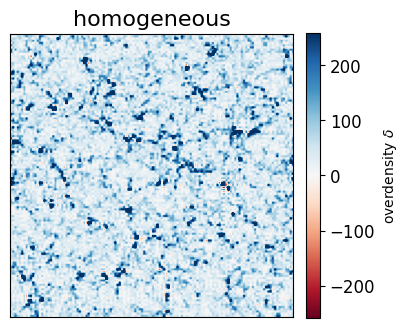

In [18]:
bias_field_labels = ['homogeneous', 'linear density field', 'quadratic density', 'tidal', 'Laplacian']
for i in range(len(bias_terms_eul_2)):
    plotter.plot_field(bias_terms_eul_2[i], figsize=(4,4), title=bias_field_labels[i],
                       show_labels=False)
    break

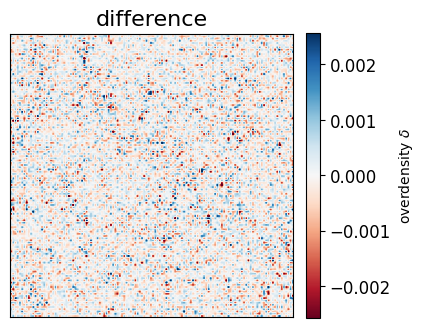

In [19]:
i=0
plotter.plot_field(bias_terms_eul_2[i]-bias_terms_eul_1[i], figsize=(4,4), title='difference',
                       show_labels=False)

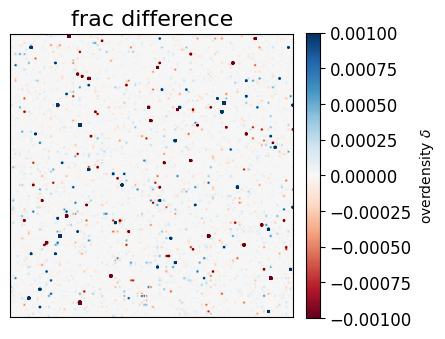

In [20]:
i=0
plotter.plot_field((bias_terms_eul_2[i]-bias_terms_eul_1[i])/(bias_terms_eul_1[i]+1e-10), figsize=(4,4), title='frac difference',
                       show_labels=False, vmax=0.001, vmin=-0.001)

## Velocity kcut

In [33]:
subdir_prefix = 'LH'
fn_vel = f'{dir_mocks}/{subdir_prefix}{idx_LH}/pred_vel.npy'
vel_full = np.load(fn_vel, mmap_mode='r')

In [34]:
def remove_highk_modes_velocity(velocity_field, box_size, n_grid_target):
    """
    Downsample velocity field by removing high-k modes.
    
    Parameters:
    -----------
    velocity_field : array, shape (3, n_grid, n_grid, n_grid)
        Velocity field with components [vx, vy, vz]
    box_size : float
        Physical size of the box
    n_grid_target : int
        Target grid resolution (must be even)
    
    Returns:
    --------
    velocity_field_kcut : array, shape (3, n_grid_target, n_grid_target, n_grid_target)
        Downsampled velocity field
    """
    n_grid = velocity_field.shape[-1]
    k_nyq = np.pi/box_size*n_grid_target
    kmesh = bacco.visualization.np_get_kmesh((n_grid, n_grid, n_grid), box_size, real=True)
    mask = (kmesh[:,:,:,0]<=k_nyq) & (kmesh[:,:,:,1]<=k_nyq) & (kmesh[:,:,:,2]<=k_nyq) & \
           (kmesh[:,:,:,0]>-k_nyq) & (kmesh[:,:,:,1]>-k_nyq) & (kmesh[:,:,:,2]>-k_nyq)
    
    velocity_field_kcut = []
    assert n_grid_target%2==0, "n_grid_target must be even!"
    
    for component_id in range(3):  # Loop over vx, vy, vz
        v_component = velocity_field[component_id]
        vk = pyfftw.builders.rfftn(v_component, auto_align_input=False, auto_contiguous=False, avoid_copy=True)
        vk_cut = vk()[mask]
        vk_cut = vk_cut.reshape(n_grid_target, n_grid_target, int(n_grid_target/2)+1)
        v_downsampled = pyfftw.builders.irfftn(vk_cut, axes=(0,1,2))()
        velocity_field_kcut.append(v_downsampled)
    
    velocity_field_kcut = np.array(velocity_field_kcut)
    return velocity_field_kcut

In [35]:
print(vel_full.shape)

(3, 512, 512, 512)


In [36]:
box_size = 1000.0
n_grid_target = 128
vel_kcut = remove_highk_modes_velocity(vel_full, box_size, n_grid_target)

In [37]:
print(vel_kcut.shape)

(3, 128, 128, 128)


In [38]:
#vel_snap_grid = bro2fv(vel_snap_ord)
vel_full_mag = np.linalg.norm(vel_full, axis=0)
print(vel_full_mag.shape)

(512, 512, 512)


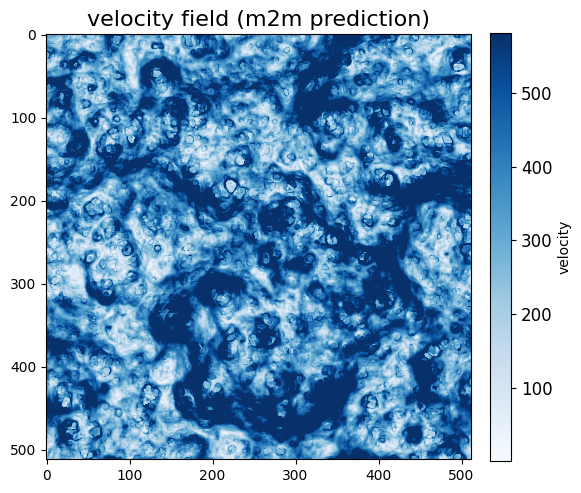

In [39]:
plotter.plot_field(vel_full_mag, title=r'velocity field (m2m prediction)',
                label_cbar='velocity', overdensity=False
                )

In [40]:
#vel_snap_grid = bro2fv(vel_snap_ord)
vel_kcut_mag = np.linalg.norm(vel_kcut, axis=0)
print(vel_kcut_mag.shape)

(128, 128, 128)


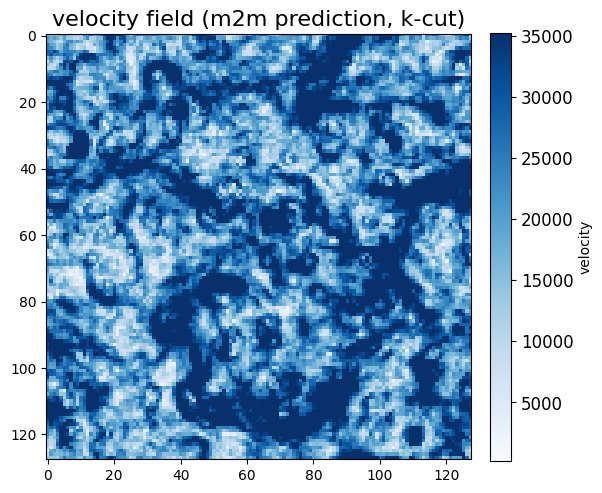

In [41]:
plotter.plot_field(vel_kcut_mag, title=r'velocity field (m2m prediction, k-cut)',
                label_cbar='velocity', overdensity=False
                )

Load in and check

In [42]:
subdir_prefix = 'LH'
fn_vel_kcut = f'{dir_mocks}/{subdir_prefix}{idx_LH}/pred_vel_kcut.npy'
# Use memory mapping to avoid loading the full array
vel_kcut_loaded = np.load(fn_vel_kcut, mmap_mode='r')
print(vel_kcut_loaded.shape)

(3, 128, 128, 128)


In [43]:
#vel_snap_grid = bro2fv(vel_snap_ord)
vel_kcut_loaded_mag = np.linalg.norm(vel_kcut_loaded, axis=0)
print(vel_kcut_loaded_mag.shape)

(128, 128, 128)


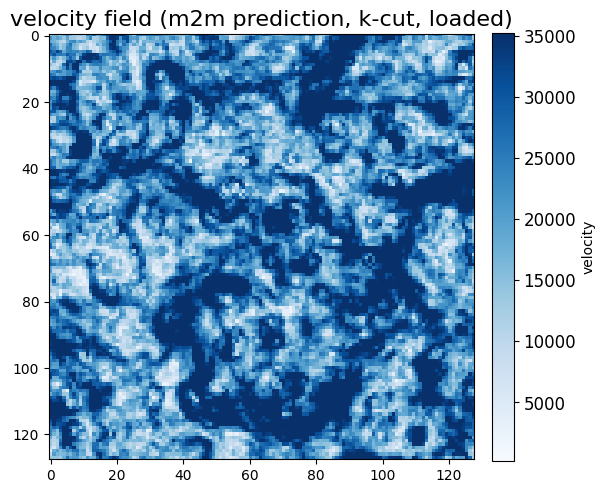

In [44]:
plotter.plot_field(vel_kcut_loaded_mag, title=r'velocity field (m2m prediction, k-cut, loaded)',
                label_cbar='velocity', overdensity=False
                )